In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download'
df_crashes= pd.read_csv(crashes_url, low_memory= False)


In [ ]:
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory = False)


In [3]:
df_crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [4]:
#EDA on df_crashes

print(df_crashes.shape)

(2221559, 29)


In [5]:
print(df_crashes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221559 entries, 0 to 2221558
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [6]:
print(df_crashes.describe(include='all'))

        CRASH DATE CRASH TIME   BOROUGH ZIP CODE      LATITUDE     LONGITUDE  \
count      2221559    2221559   1541066  1540789  1.981191e+06  1.981191e+06   
unique        4887       1440         5      235           NaN           NaN   
top     01/21/2014      16:00  BROOKLYN    11207           NaN           NaN   
freq          1161      29707    493922    30446           NaN           NaN   
mean           NaN        NaN       NaN      NaN  4.058943e+01 -7.368250e+01   
std            NaN        NaN       NaN      NaN  2.337448e+00  4.344364e+00   
min            NaN        NaN       NaN      NaN  0.000000e+00 -2.013600e+02   
25%            NaN        NaN       NaN      NaN  4.066734e+01 -7.397453e+01   
50%            NaN        NaN       NaN      NaN  4.072031e+01 -7.392673e+01   
75%            NaN        NaN       NaN      NaN  4.076956e+01 -7.386657e+01   
max            NaN        NaN       NaN      NaN  4.334444e+01  0.000000e+00   

          LOCATION                    O

In [7]:
#Putting date and time in one column
df_crashes["CRASH DATE"] = df_crashes["CRASH DATE"] + " " + df_crashes["CRASH TIME"]
df_crashes["CRASH DATE"] = pd.to_datetime(df_crashes["CRASH DATE"])


From the date column, let us create four more columns,


1.   Crash year, will have only the year of crash.

2.   Crash month will have the month relating to the crash in numeric format.

3.   Crash month name will be the name of the month.

4.   Crash hour will be the hour of the day, in 24hr format, when the crash occurred.


In [8]:
df_crashes["CRASH YEAR"] = df_crashes["CRASH DATE"].dt.year
df_crashes["CRASH MONTH"] = df_crashes["CRASH DATE"].dt.month
df_crashes["CRASH MONTH NAME"] = df_crashes["CRASH DATE"].dt.strftime('%b')
df_crashes["CRASH HOUR"] = df_crashes["CRASH DATE"].dt.hour
df_crashes["CRASH WEEK"] = df_crashes["CRASH DATE"].dt.strftime('%a')

In [12]:
df_crashes.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'CRASH YEAR', 'CRASH MONTH', 'CRASH MONTH NAME', 'CRASH HOUR',
       'CRASH WEEK'],
      dtype='object')

We decided to drop some of the columns related to the location that were too specific such as:


1.   Zip code
2.   Longitude and Latitude coordinates
3.   Streets

We also dropped the additional contributing factors and vehicle codes.



In [13]:
to_drop = ['ZIP CODE', 'LATITUDE', 'LONGITUDE','LOCATION','OFF STREET NAME',
          'CRASH TIME', 'ON STREET NAME','CROSS STREET NAME',
           'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
           'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
df_clean = df_crashes.drop(to_drop, axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221559 entries, 0 to 2221558
Data columns (total 20 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   BOROUGH                        object        
 2   NUMBER OF PERSONS INJURED      float64       
 3   NUMBER OF PERSONS KILLED       float64       
 4   NUMBER OF PEDESTRIANS INJURED  int64         
 5   NUMBER OF PEDESTRIANS KILLED   int64         
 6   NUMBER OF CYCLIST INJURED      int64         
 7   NUMBER OF CYCLIST KILLED       int64         
 8   NUMBER OF MOTORIST INJURED     int64         
 9   NUMBER OF MOTORIST KILLED      int64         
 10  CONTRIBUTING FACTOR VEHICLE 1  object        
 11  CONTRIBUTING FACTOR VEHICLE 2  object        
 12  COLLISION_ID                   int64         
 13  VEHICLE TYPE CODE 1            object        
 14  VEHICLE TYPE CODE 2            object        
 15  CRASH YEAR     

In [14]:
df_clean.isna().sum()


,0
CRASH DATE,0
BOROUGH,680493
NUMBER OF PERSONS INJURED,18
NUMBER OF PERSONS KILLED,31
NUMBER OF PEDESTRIANS INJURED,0
NUMBER OF PEDESTRIANS KILLED,0
NUMBER OF CYCLIST INJURED,0
NUMBER OF CYCLIST KILLED,0
NUMBER OF MOTORIST INJURED,0
NUMBER OF MOTORIST KILLED,0


In [15]:
df_clean[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2']].value_counts()


CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2 
Unspecified                     Unspecified                       548597
Driver Inattention/Distraction  Unspecified                       307311
Following Too Closely           Unspecified                       104801
Failure to Yield Right-of-Way   Unspecified                        88394
Driver Inattention/Distraction  Driver Inattention/Distraction     74692
                                                                   ...  
Accelerator Defective           Obstruction/Debris                     1
                                Failure to Keep Right                  1
                                Passing Too Closely                    1
                                Outside Car Distraction                1
80                              Tire Failure/Inadequate                1
Name: count, Length: 1817, dtype: int64

In [17]:
df_clean['VEHICLE TYPE CODE 1'].value_counts()[df_clean['VEHICLE TYPE CODE 1'].value_counts()> 1000]


,count
VEHICLE TYPE CODE 1,
Sedan,642338
Station Wagon/Sport Utility Vehicle,503047
PASSENGER VEHICLE,416206
SPORT UTILITY / STATION WAGON,180291
Taxi,55884
4 dr sedan,40187
Pick-up Truck,38269
TAXI,31911
Box Truck,26565


In [18]:
df_clean[['BOROUGH']].value_counts()

,count
BOROUGH,
BROOKLYN,493922
QUEENS,412931
MANHATTAN,341511
BRONX,228187
STATEN ISLAND,64515


For the null values, we decided to:


1.   Replace null values for contributing factors with "Unspecified" cause we have a lot of nulls.
2.   Replace null values for contributing factors and Borough with "UNKOWN" cause we have a lot of nulls.
3.   Drop null values for number of persons injured and killed cause they are very few.



In [19]:
contributing_factors = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']
for col in contributing_factors:
    df_clean[col] = df_clean[col].fillna('Unspecified')

vehicle_type_codes = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','BOROUGH']
for col in vehicle_type_codes:
    df_clean[col] = df_clean[col].fillna('UNKNOWN')

# Drop null values for persons injured and killed
df_clean.dropna(subset=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'], inplace=True)

print(df_clean.isna().sum())

CRASH DATE                       0
BOROUGH                          0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
CRASH YEAR                       0
CRASH MONTH                      0
CRASH MONTH NAME                 0
CRASH HOUR                       0
CRASH WEEK                       0
dtype: int64


In [20]:
# Dropping duplicate rows
df_clean.drop_duplicates(inplace=True)

*   SPORT UTILITY / STATION WAGON and Station Wagon/Sport Utility Vehicle are treated as different categories, we will rename the former to match the later.
*   The same is observed in the instances of Sedan vs dr 4 sedan.



In [21]:
df_clean["VEHICLE TYPE CODE 1"] = df_clean["VEHICLE TYPE CODE 1"].replace(["SPORT UTILITY / STATION WAGON"], "Station Wagon/Sport Utility Vehicle")
df_clean["VEHICLE TYPE CODE 2"] = df_clean["VEHICLE TYPE CODE 2"].replace(["SPORT UTILITY / STATION WAGON"], "Station Wagon/Sport Utility Vehicle")
df_clean['VEHICLE TYPE CODE 1'] = df_clean['VEHICLE TYPE CODE 1'].replace(["4 dr sedan"], "Sedan")
df_clean['VEHICLE TYPE CODE 2'] = df_clean['VEHICLE TYPE CODE 2'].replace(["4 dr sedan"], "Sedan")

In [22]:
# Number of persons injured and killed should be int not float
df_clean['NUMBER OF PERSONS INJURED'] = df_clean['NUMBER OF PERSONS INJURED'].astype(int)
df_clean['NUMBER OF PERSONS KILLED'] = df_clean['NUMBER OF PERSONS KILLED'].astype(int)

In [23]:
# Standardizing factors and vehicle types to be small
df_clean['VEHICLE TYPE CODE 1'] = df_clean['VEHICLE TYPE CODE 1'].str.lower()
df_clean['VEHICLE TYPE CODE 2'] = df_clean['VEHICLE TYPE CODE 2'].str.lower()
df_clean['CONTRIBUTING FACTOR VEHICLE 1'] = df_clean['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()
df_clean['CONTRIBUTING FACTOR VEHICLE 2'] = df_clean['CONTRIBUTING FACTOR VEHICLE 2'].str.lower()


We classified the collision as safe if no one was injured or killed and dangerous if else.

In [33]:
def conditions(df):
    if (df['NUMBER OF PERSONS INJURED'] == 0) and (df['NUMBER OF PERSONS KILLED'] == 0) :
        return 0
    else:
        return 1

df_clean['IsDanger'] = df_clean.apply(conditions, axis=1)

Question 1:
How does the rate of collisions change by each year?

We find that collisions rose dramatically in 2013 and then dipped in 2020 (probably because of lockdown)

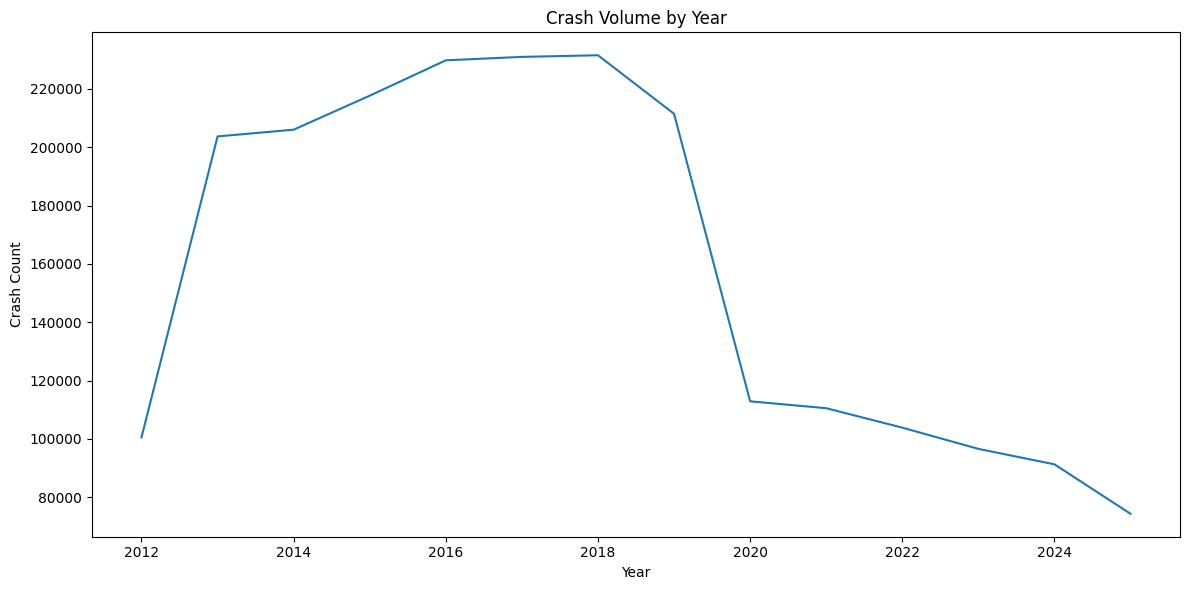

In [29]:
# Crash volume trend by year
crash_volume_by_year = df_crashes.groupby('CRASH YEAR')['COLLISION_ID'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=crash_volume_by_year.index, y=crash_volume_by_year.values)
plt.title('Crash Volume by Year')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.tight_layout()
plt.show()


Question 2:
How does the rate of collisions change by the hour?

We find that collisions peak between 6pm and 7pm because this is the rush hour in which workers and employees leave work in NYC.

/tmp/ipython-input-3763915162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_crash, x="CRASH HOUR", y="Number Of Collisions", palette=palette_y)
/tmp/ipython-input-3763915162.py:5: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=hourly_crash, x="CRASH HOUR", y="Number Of Collisions", palette=palette_y)


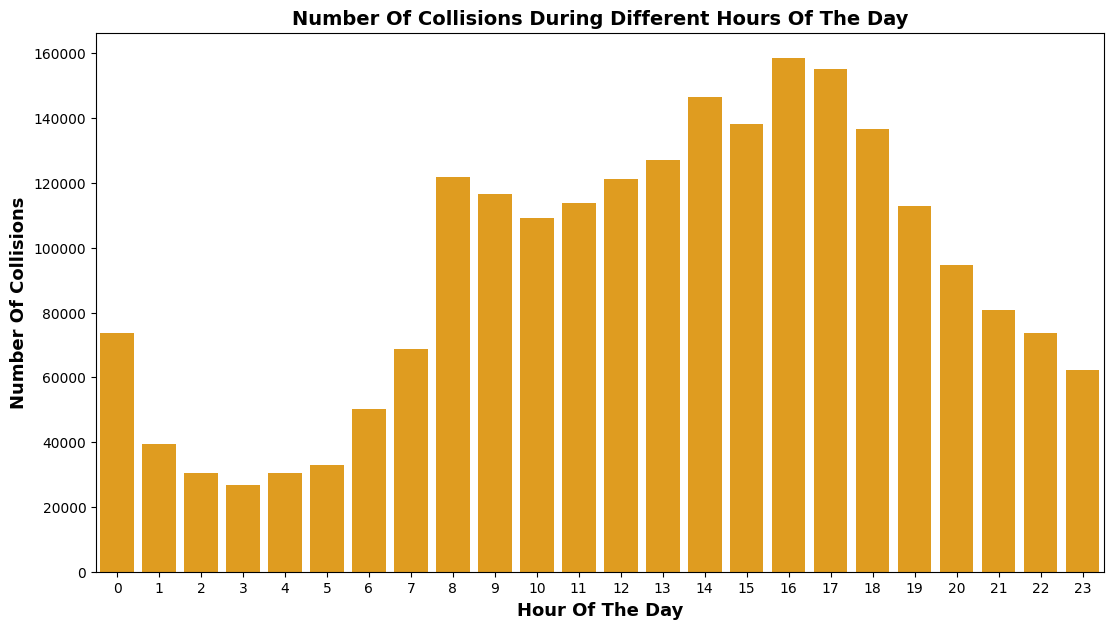

In [32]:
hourly_crash = df_clean.groupby("CRASH HOUR").size().reset_index(name="Number Of Collisions")
palette_x= ["blue"]
palette_y= ["orange"]
plt.figure(figsize=(13,7))
sns.barplot(data=hourly_crash, x="CRASH HOUR", y="Number Of Collisions", palette=palette_y)
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Hour Of The Day", fontweight="bold", fontsize=13)
plt.title("Number Of Collisions During Different Hours Of The Day",
          fontweight="bold", fontsize=14)

plt.show()

Question 3:
What are the top contributing factors of dangerous collisions?

Driver's attention or distraction is the main factor for a very large number of the collisions.


/tmp/ipython-input-663023021.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_factors.index, y=top_5_factors.values, palette='viridis')


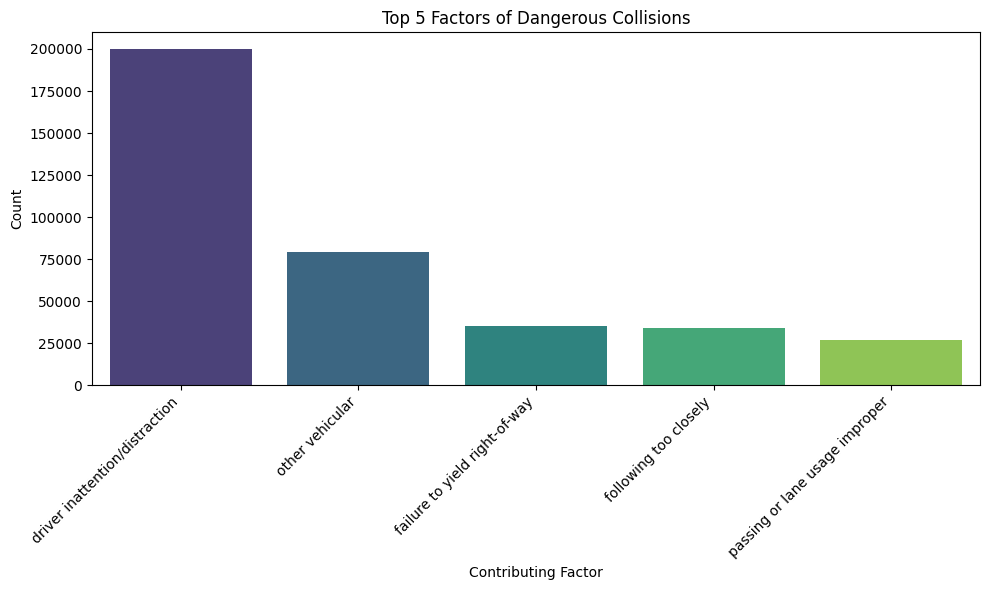

In [36]:
# Plot for the top 5 factors of DANGEROUS collisions (Combine both factors 1 and 2 and remove unspecified)
df_not_unspecified = df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] != 'unspecified') & (df_clean['CONTRIBUTING FACTOR VEHICLE 2'] != 'unspecified')]
top_5_factors = df_not_unspecified['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(5)
top_5_factors = top_5_factors.add(df_not_unspecified['CONTRIBUTING FACTOR VEHICLE 2'].value_counts().head(5), fill_value=0)
top_5_factors = top_5_factors.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_factors.index, y=top_5_factors.values, palette='viridis')
plt.title('Top 5 Factors of Dangerous Collisions')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [ ]:

df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


# **EDA for df_persons**

In [ ]:
print(df_persons.shape)

(5822658, 21)


In [ ]:
print(df_persons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822658 entries, 0 to 5822657
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 932.

In [ ]:
print(df_persons.describe(include='all'))

           UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME PERSON_ID  \
count   5.822658e+06  5.822658e+06     5822658    5822658   5822639   
unique           NaN           NaN        4886       1440   5627835   
top              NaN           NaN  11/15/2018       0:00         1   
freq             NaN           NaN        4220      87469    142787   
mean    9.376661e+06  4.016632e+06         NaN        NaN       NaN   
std     2.762855e+06  6.649750e+05         NaN        NaN       NaN   
min     1.092200e+04  3.700000e+01         NaN        NaN       NaN   
25%     7.099309e+06  3.705553e+06         NaN        NaN       NaN   
50%     9.574334e+06  4.060754e+06         NaN        NaN       NaN   
75%     1.188629e+07  4.439549e+06         NaN        NaN       NaN   
max     1.353666e+07  4.858114e+06         NaN        NaN       NaN   

       PERSON_TYPE PERSON_INJURY    VEHICLE_ID    PERSON_AGE     EJECTION  \
count      5822658       5822658  5.581137e+06  5.172206e+06      2993

In [ ]:
print(df_persons.isna().sum())

UNIQUE_ID                      0
COLLISION_ID                   0
CRASH_DATE                     0
CRASH_TIME                     0
PERSON_ID                     19
PERSON_TYPE                    0
PERSON_INJURY                  0
VEHICLE_ID                241521
PERSON_AGE                650452
EJECTION                 2828930
EMOTIONAL_STATUS         2731835
BODILY_INJURY            2731792
POSITION_IN_VEHICLE      2828473
SAFETY_EQUIPMENT         3031915
PED_LOCATION             5720211
PED_ACTION               5720312
COMPLAINT                2731785
PED_ROLE                  194889
CONTRIBUTING_FACTOR_1    5721591
CONTRIBUTING_FACTOR_2    5721724
PERSON_SEX                643755
dtype: int64


In [ ]:
for col in df_persons.columns:
  print(f"Unique values in '{col}': ")
  print(df_persons[col].nunique())
  print("-" * 20)

Unique values in 'UNIQUE_ID': 
5822658
--------------------
Unique values in 'COLLISION_ID': 
1591290
--------------------
Unique values in 'CRASH_DATE': 
4886
--------------------
Unique values in 'CRASH_TIME': 
1440
--------------------
Unique values in 'PERSON_ID': 
5627835
--------------------
Unique values in 'PERSON_TYPE': 
4
--------------------
Unique values in 'PERSON_INJURY': 
3
--------------------
Unique values in 'VEHICLE_ID': 
2701790
--------------------
Unique values in 'PERSON_AGE': 
907
--------------------
Unique values in 'EJECTION': 
6
--------------------
Unique values in 'EMOTIONAL_STATUS': 
8
--------------------
Unique values in 'BODILY_INJURY': 
14
--------------------
Unique values in 'POSITION_IN_VEHICLE': 
11
--------------------
Unique values in 'SAFETY_EQUIPMENT': 
17
--------------------
Unique values in 'PED_LOCATION': 
4
--------------------
Unique values in 'PED_ACTION': 
16
--------------------
Unique values in 'COMPLAINT': 
21
--------------------
U

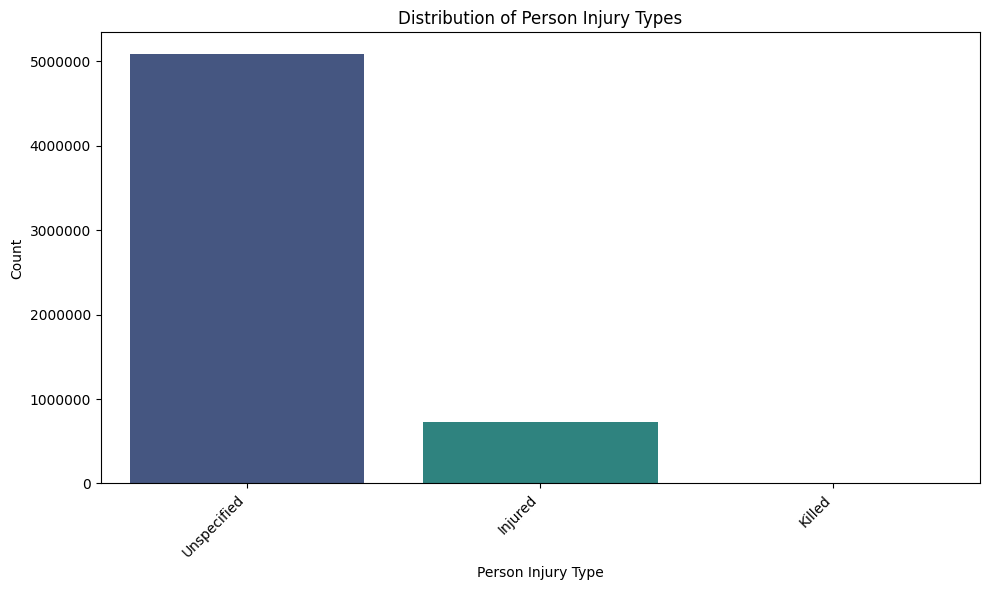

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each unique value in the 'PERSON_INJURY' column
injury_counts = df_persons['PERSON_INJURY'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=injury_counts.index, y=injury_counts.values, hue=injury_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Person Injury Types')
plt.xlabel('Person Injury Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Ensure y-axis shows actual counts plainly
plt.tight_layout()
plt.show()

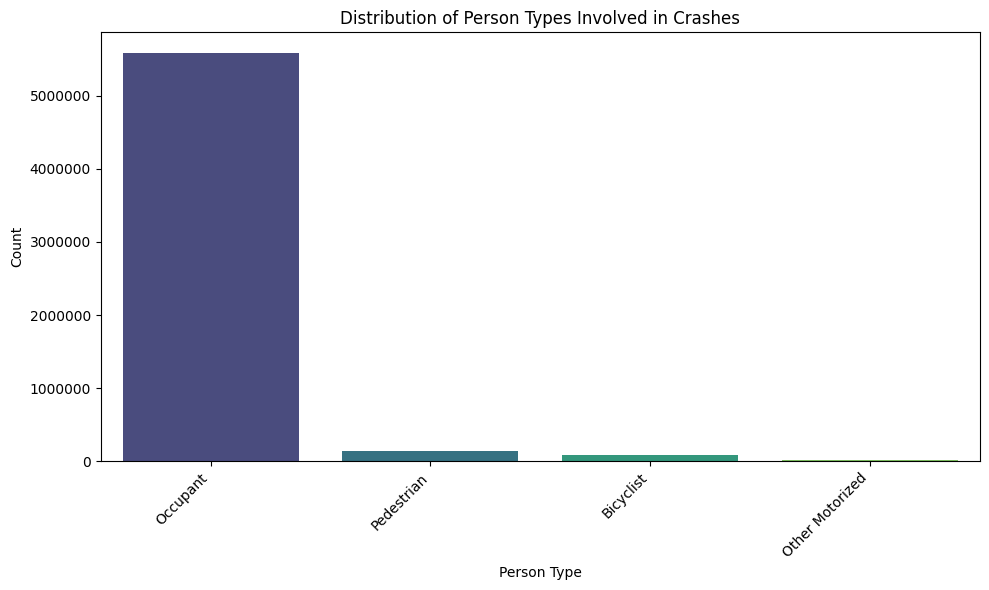

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each unique value in the 'PERSON_TYPE' column
person_type_counts = df_persons['PERSON_TYPE'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=person_type_counts.index, y=person_type_counts.values, hue=person_type_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Person Types Involved in Crashes')
plt.xlabel('Person Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Ensure y-axis shows actual counts plainly
plt.tight_layout()
plt.show()

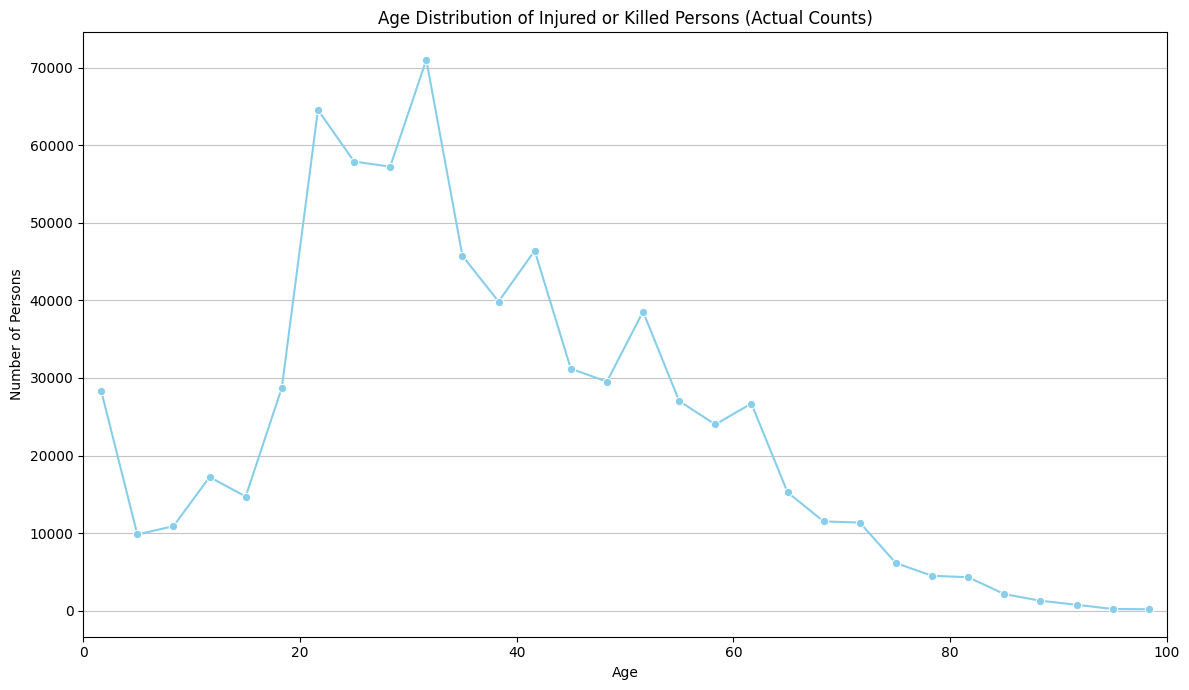

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the DataFrame for persons who were either 'Injured' or 'Killed'
injured_killed_persons = df_persons[df_persons['PERSON_INJURY'].isin(['Injured', 'Killed'])].copy()

# Select the 'PERSON_AGE' column and filter out anomalous age entries (ages < 0)
filtered_ages = injured_killed_persons[injured_killed_persons['PERSON_AGE'] >= 0]['PERSON_AGE'].dropna()

# Define bins for age and calculate counts within each bin
# Using 30 bins over the 0-100 range, similar to the previous histplot
bins = np.linspace(0, 100, 31) # Create 30 bins for ages from 0 to 100
counts, bin_edges = np.histogram(filtered_ages, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a line plot of the binned counts
plt.figure(figsize=(12, 7))
sns.lineplot(x=bin_centers, y=counts, color='skyblue', marker='o', errorbar=None) # Added markers for clarity
plt.title('Age Distribution of Injured or Killed Persons (Actual Counts)')
plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 100) # Ensure x-axis limit remains 0 to 100
plt.tight_layout()
plt.show()

### ***Cleaning for df_crashes***

In [ ]:
##combine the 'CRASH DATE' and 'CRASH TIME' columns into a single 'CRASH DATETIME' column

df_crashes['CRASH DATETIME'] = pd.to_datetime(df_crashes['CRASH DATE'] + ' ' + df_crashes['CRASH TIME'], format='%m/%d/%Y %H:%M')
df_crashes.drop(columns=['CRASH DATE', 'CRASH TIME'], inplace=True)
print(df_crashes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221301 entries, 0 to 2221300
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   BOROUGH                        object        
 1   ZIP CODE                       object        
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   CROSS STREET NAME              object        
 7   OFF STREET NAME                object        
 8   NUMBER OF PERSONS INJURED      float64       
 9   NUMBER OF PERSONS KILLED       float64       
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

In [ ]:
##Fill nulls of NUMBER OF PERSONS INJURED' and NUMBER OF PERSONS INJURED' with 0
##mean would not work because of the range of the values
df_crashes['NUMBER OF PERSONS INJURED'] = df_crashes['NUMBER OF PERSONS INJURED'].fillna(0).astype(int)
df_crashes['NUMBER OF PERSONS KILLED'] = df_crashes['NUMBER OF PERSONS KILLED'].fillna(0).astype(int)
print(df_crashes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221301 entries, 0 to 2221300
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   BOROUGH                        object        
 1   ZIP CODE                       object        
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   CROSS STREET NAME              object        
 7   OFF STREET NAME                object        
 8   NUMBER OF PERSONS INJURED      int64         
 9   NUMBER OF PERSONS KILLED       int64         
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

In [ ]:
##fill all catigorical values withh Unknown
categorical_cols_to_fill = [
    'BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]

for col in categorical_cols_to_fill:
    df_crashes[col] = df_crashes[col].fillna('Unknown')

print(df_crashes.info())
print(df_crashes[categorical_cols_to_fill].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221301 entries, 0 to 2221300
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   BOROUGH                        object        
 1   ZIP CODE                       object        
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   CROSS STREET NAME              object        
 7   OFF STREET NAME                object        
 8   NUMBER OF PERSONS INJURED      int64         
 9   NUMBER OF PERSONS KILLED       int64         
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

In [ ]:
##Fill missing values of latitude and longitude with 0

df_crashes['LATITUDE'] = df_crashes['LATITUDE'].fillna(0)
df_crashes['LONGITUDE'] = df_crashes['LONGITUDE'].fillna(0)
print(df_crashes.info())
print(df_crashes[['LATITUDE', 'LONGITUDE']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221301 entries, 0 to 2221300
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   BOROUGH                        object        
 1   ZIP CODE                       object        
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   CROSS STREET NAME              object        
 7   OFF STREET NAME                object        
 8   NUMBER OF PERSONS INJURED      int64         
 9   NUMBER OF PERSONS KILLED       int64         
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

# ***Cleaning for df_persons***

In [ ]:
##also make crash date and crash time in one cell
df_persons['CRASH_DATETIME'] = pd.to_datetime(df_persons['CRASH_DATE'] + ' ' + df_persons['CRASH_TIME'], format='%m/%d/%Y %H:%M')
df_persons.drop(columns=['CRASH_DATE', 'CRASH_TIME'], inplace=True)
print(df_persons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822658 entries, 0 to 5822657
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   UNIQUE_ID              int64         
 1   COLLISION_ID           int64         
 2   PERSON_ID              object        
 3   PERSON_TYPE            object        
 4   PERSON_INJURY          object        
 5   VEHICLE_ID             float64       
 6   PERSON_AGE             float64       
 7   EJECTION               object        
 8   EMOTIONAL_STATUS       object        
 9   BODILY_INJURY          object        
 10  POSITION_IN_VEHICLE    object        
 11  SAFETY_EQUIPMENT       object        
 12  PED_LOCATION           object        
 13  PED_ACTION             object        
 14  COMPLAINT              object        
 15  PED_ROLE               object        
 16  CONTRIBUTING_FACTOR_1  object        
 17  CONTRIBUTING_FACTOR_2  object        
 18  PERSON_SEX            

In [ ]:
##Fix outliers in age cell
import numpy as np
df_persons['PERSON_AGE'] = df_persons['PERSON_AGE'].replace(-999, np.nan).astype(float)
print(df_persons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822658 entries, 0 to 5822657
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   UNIQUE_ID              int64         
 1   COLLISION_ID           int64         
 2   PERSON_ID              object        
 3   PERSON_TYPE            object        
 4   PERSON_INJURY          object        
 5   VEHICLE_ID             float64       
 6   PERSON_AGE             float64       
 7   EJECTION               object        
 8   EMOTIONAL_STATUS       object        
 9   BODILY_INJURY          object        
 10  POSITION_IN_VEHICLE    object        
 11  SAFETY_EQUIPMENT       object        
 12  PED_LOCATION           object        
 13  PED_ACTION             object        
 14  COMPLAINT              object        
 15  PED_ROLE               object        
 16  CONTRIBUTING_FACTOR_1  object        
 17  CONTRIBUTING_FACTOR_2  object        
 18  PERSON_SEX            

In [ ]:
##also fill null values in catigorical columns with unknown
categorical_cols_to_fill_persons = [
    'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
    'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT', 'PED_ROLE',
    'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PERSON_SEX'
]

for col in categorical_cols_to_fill_persons:
    df_persons[col] = df_persons[col].fillna('Unknown')

print(df_persons.info())
print(df_persons[categorical_cols_to_fill_persons].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822658 entries, 0 to 5822657
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   UNIQUE_ID              int64         
 1   COLLISION_ID           int64         
 2   PERSON_ID              object        
 3   PERSON_TYPE            object        
 4   PERSON_INJURY          object        
 5   VEHICLE_ID             float64       
 6   PERSON_AGE             float64       
 7   EJECTION               object        
 8   EMOTIONAL_STATUS       object        
 9   BODILY_INJURY          object        
 10  POSITION_IN_VEHICLE    object        
 11  SAFETY_EQUIPMENT       object        
 12  PED_LOCATION           object        
 13  PED_ACTION             object        
 14  COMPLAINT              object        
 15  PED_ROLE               object        
 16  CONTRIBUTING_FACTOR_1  object        
 17  CONTRIBUTING_FACTOR_2  object        
 18  PERSON_SEX            

In [ ]:
##fill missing values in personId and vehicleID with unknown
df_persons['PERSON_ID'] = df_persons['PERSON_ID'].fillna('Unknown')
df_persons['VEHICLE_ID'] = df_persons['VEHICLE_ID'].fillna('Unknown')

print(df_persons.info())
print(df_persons[['PERSON_ID', 'VEHICLE_ID']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822658 entries, 0 to 5822657
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   UNIQUE_ID              int64         
 1   COLLISION_ID           int64         
 2   PERSON_ID              object        
 3   PERSON_TYPE            object        
 4   PERSON_INJURY          object        
 5   VEHICLE_ID             object        
 6   PERSON_AGE             float64       
 7   EJECTION               object        
 8   EMOTIONAL_STATUS       object        
 9   BODILY_INJURY          object        
 10  POSITION_IN_VEHICLE    object        
 11  SAFETY_EQUIPMENT       object        
 12  PED_LOCATION           object        
 13  PED_ACTION             object        
 14  COMPLAINT              object        
 15  PED_ROLE               object        
 16  CONTRIBUTING_FACTOR_1  object        
 17  CONTRIBUTING_FACTOR_2  object        
 18  PERSON_SEX            

# **Check for outliers**

### Outlier Remediation Strategy
Using the 1.5×IQR thresholds we just profiled, the following cell caps injury/fatality counts to the upper whisker bounds and enforces realistic age ranges in the persons table. This preserves distributional shape while preventing extreme values from skewing aggregates and plots.


In [ ]:
# Apply IQR capping to crash injury/fatality counts and clean person ages
def cap_outliers_iqr(df, columns):
    adjustments = []
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = max(q1 - 1.5 * iqr, 0)
        upper = q3 + 1.5 * iqr
        before = df[col].copy()
        df[col] = df[col].clip(lower=lower, upper=upper).round().astype(int)
        changed = (before != df[col]).sum()
        adjustments.append({'column': col, 'adjusted_rows': int(changed), 'upper_cap': upper})
    return pd.DataFrame(adjustments)

injury_cols = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

injury_adjustments_summary = cap_outliers_iqr(df_crashes, injury_cols)
print("Rows adjusted per injury/fatality column:")
print(injury_adjustments_summary)

# Cap person ages to the 1st-99th percentile range after removing negatives
age_lower = 0
age_upper = df_persons['PERSON_AGE'].quantile(0.99)
before_age = df_persons['PERSON_AGE'].copy()
df_persons['PERSON_AGE'] = df_persons['PERSON_AGE'].clip(lower=age_lower, upper=age_upper)
age_changes = (before_age != df_persons['PERSON_AGE']).sum()
print(f"Person ages clipped outside [{age_lower}, {age_upper:.1f}] for {int(age_changes)} rows")


Rows adjusted per injury/fatality column:
                          column  adjusted_rows  upper_cap
0      NUMBER OF PERSONS INJURED         538482        0.0
1       NUMBER OF PERSONS KILLED           3373        0.0
2  NUMBER OF PEDESTRIANS INJURED         127001        0.0
3   NUMBER OF PEDESTRIANS KILLED           1716        0.0
4      NUMBER OF CYCLIST INJURED          64041        0.0
5       NUMBER OF CYCLIST KILLED            279        0.0
6     NUMBER OF MOTORIST INJURED         341154        0.0
7      NUMBER OF MOTORIST KILLED           1322        0.0
Person ages clipped outside [0, 80.0] for 698075 rows


In [ ]:
import numpy as np

numerical_cols = df_crashes.select_dtypes(include=['int64', 'float64']).columns

outlier_counts = {}

for col in numerical_cols:
    Q1 = df_crashes[col].quantile(0.25)
    Q3 = df_crashes[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    num_outliers = df_crashes[(df_crashes[col] < lower_bound) | (df_crashes[col] > upper_bound)].shape[0]
    outlier_counts[col] = num_outliers

print("Number of outliers in each numerical column (1.5*IQR rule):")
for col, count in outlier_counts.items():
    print(f"'{col}': {count}")

Number of outliers in each numerical column (1.5*IQR rule):
'LATITUDE': 246921
'LONGITUDE': 263258
'COLLISION_ID': 411741


In [ ]:
import numpy as np

numerical_cols_persons = df_persons.select_dtypes(include=['int64', 'float64']).columns

outlier_counts_persons = {}

for col in numerical_cols_persons:
    Q1 = df_persons[col].quantile(0.25)
    Q3 = df_persons[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    num_outliers = df_persons[(df_persons[col] < lower_bound) | (df_persons[col] > upper_bound)].shape[0]
    outlier_counts_persons[col] = num_outliers

print("Number of outliers in each numerical column of df_persons (1.5*IQR rule):")
for col, count in outlier_counts_persons.items():
    print(f"'{col}': {count}")

Number of outliers in each numerical column of df_persons (1.5*IQR rule):
'UNIQUE_ID': 0
'COLLISION_ID': 107009
'PERSON_AGE': 0


### Duplicate Remediation
After quantifying duplicate `COLLISION_ID` counts, we explicitly drop any repeated crash, person, or integrated records to ensure downstream aggregations are not double-counted.


In [ ]:
# Remove duplicate rows before integration
crashes_before = len(df_crashes)
df_crashes = df_crashes.drop_duplicates()
print(f"Dropped {crashes_before - len(df_crashes)} duplicate crash rows")

# UNIQUE_ID should already be unique, but we guard against accidental duplication
persons_before = len(df_persons)
df_persons = df_persons.drop_duplicates(subset=['UNIQUE_ID'])
print(f"Dropped {persons_before - len(df_persons)} duplicate person rows")

# Also ensure no duplicate COLLISION_ID + PERSON_ID combinations remain
persons_before_combo = len(df_persons)
df_persons = df_persons.drop_duplicates(subset=['COLLISION_ID', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY'])
print(f"Dropped {persons_before_combo - len(df_persons)} duplicate person role rows")


Dropped 0 duplicate crash rows
Dropped 0 duplicate person rows
Dropped 0 duplicate person role rows


In [ ]:
import numpy as np

numerical_cols_crashes = df_crashes.select_dtypes(include=['int64', 'float64']).columns

# Columns to exclude from outlier detection
excluded_cols = ['LATITUDE', 'LONGITUDE', 'COLLISION_ID']

# Filter numerical columns to exclude specified ones
filtered_numerical_cols_crashes = [col for col in numerical_cols_crashes if col not in excluded_cols]

outlier_counts_crashes_filtered = {}

for col in filtered_numerical_cols_crashes:
    Q1 = df_crashes[col].quantile(0.25)
    Q3 = df_crashes[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    num_outliers = df_crashes[(df_crashes[col] < lower_bound) | (df_crashes[col] > upper_bound)].shape[0]
    outlier_counts_crashes_filtered[col] = num_outliers

print("Number of outliers in df_crashes numerical columns (excluding LATITUDE, LONGITUDE, COLLISION_ID) (1.5*IQR rule):")
for col, count in outlier_counts_crashes_filtered.items():
    print(f"'{col}': {count}")

Number of outliers in df_crashes numerical columns (excluding LATITUDE, LONGITUDE, COLLISION_ID) (1.5*IQR rule):


In [ ]:
import numpy as np

numerical_cols_persons = df_persons.select_dtypes(include=['int64', 'float64']).columns

# Columns to exclude from outlier detection
excluded_cols_persons = ['UNIQUE_ID', 'COLLISION_ID']

# Filter numerical columns to exclude specified ones
filtered_numerical_cols_persons = [col for col in numerical_cols_persons if col not in excluded_cols_persons]

outlier_counts_persons_filtered = {}

for col in filtered_numerical_cols_persons:
    Q1 = df_persons[col].quantile(0.25)
    Q3 = df_persons[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    num_outliers = df_persons[(df_persons[col] < lower_bound) | (df_persons[col] > upper_bound)].shape[0]
    outlier_counts_persons_filtered[col] = num_outliers

print("Number of outliers in df_persons numerical columns (excluding UNIQUE_ID and COLLISION_ID) (1.5*IQR rule):")
for col, count in outlier_counts_persons_filtered.items():
    print(f"'{col}': {count}")

Number of outliers in df_persons numerical columns (excluding UNIQUE_ID and COLLISION_ID) (1.5*IQR rule):
'PERSON_AGE': 0


In [ ]:
print("Number of unique COLLISION_ID in df_crashes:", df_crashes['COLLISION_ID'].nunique())
print("Total rows in df_crashes:", len(df_crashes))
print("Number of duplicate COLLISION_ID in df_crashes:", df_crashes['COLLISION_ID'].duplicated().sum())

print("\nNumber of unique COLLISION_ID in df_persons:", df_persons['COLLISION_ID'].nunique())
print("Total rows in df_persons:", len(df_persons))
print("Number of duplicate COLLISION_ID in df_persons:", df_persons['COLLISION_ID'].duplicated().sum())

NameError: name 'df_crashes' is not defined

In [ ]:
df_merged = pd.merge(df_crashes, df_persons, on='COLLISION_ID', how='left')
print("Shape of the merged DataFrame:", df_merged.shape)
print("First 5 rows of the merged DataFrame:")
print(df_merged.head())

: 

: 

Post-Integration Cleaning


In [ ]:
print(df_merged.shape)

In [ ]:
print(df_merged.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6447176 entries, 0 to 6447175
Data columns (total 47 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   BOROUGH                        object        
 1   ZIP CODE                       object        
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   CROSS STREET NAME              object        
 7   OFF STREET NAME                object        
 8   NUMBER OF PERSONS INJURED      int64         
 9   NUMBER OF PERSONS KILLED       int64         
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

In [ ]:
print(df_merged.isnull().sum())


BOROUGH                                0
ZIP CODE                               0
LATITUDE                               0
LONGITUDE                              0
LOCATION                          637137
ON STREET NAME                         0
CROSS STREET NAME                      0
OFF STREET NAME                        0
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2          0
CONTRIBUTING FACTOR VEHICLE 3          0
CONTRIBUTING FACTOR VEHICLE 4          0
CONTRIBUTING FACTOR VEHICLE 5          0
COLLISION_ID                           0
VEHICLE TYPE CODE 1                    0
VEHICLE TYPE CODE 2                    0
VEHICLE TYPE COD

In [ ]:
print(df_merged.describe(include='all'))


        BOROUGH ZIP CODE      LATITUDE     LONGITUDE    LOCATION  \
count   6447176  6447176  6.447176e+06  6.447176e+06     5810039   
unique        6      236           NaN           NaN      333618   
top     Unknown  Unknown           NaN           NaN  (0.0, 0.0)   
freq    2305590  2306592           NaN           NaN       21619   
mean        NaN      NaN  3.656338e+01 -6.637378e+01         NaN   
min         NaN      NaN  0.000000e+00 -2.013600e+02         NaN   
25%         NaN      NaN  4.064270e+01 -7.396434e+01         NaN   
50%         NaN      NaN  4.070791e+01 -7.391327e+01         NaN   
75%         NaN      NaN  4.076543e+01 -7.383173e+01         NaN   
max         NaN      NaN  4.334444e+01  0.000000e+00         NaN   
std         NaN      NaN  1.233494e+01  2.241758e+01         NaN   

       ON STREET NAME CROSS STREET NAME OFF STREET NAME  \
count         6447176           6447176         6447176   
unique          22696             24799          259173   
top   

In [ ]:
print(df_merged.duplicated().sum())

0


Data looks good with no duplicates and not that many nulls so we will not be changing anything.

In [ ]:
!pip install pyarrow

In [ ]:
# Convert the column to string to handle both numbers and 'Unknown'
df_merged['VEHICLE_ID'] = df_merged['VEHICLE_ID'].astype(str)

# Use Parquet instead of CSV. It is much faster and smaller,
# keeping your repo size low (GitHub has a 100MB limit).
# Now try saving again
df_merged.to_parquet('crashes.parquet')

In [ ]:
import pandas as pd

# Load the file
df = pd.read_parquet('crashes.parquet')

# Print all column names
print("\n--- COLUMN NAMES IN YOUR FILE ---")
print(df.columns.tolist())
print("---------------------------------\n")